# Quiz 1
By Nutchanon Ninyawee, Std.ID 57070503410

In [10]:
import cv2
from matplotlib import pyplot as plt
from skimage import io, data
import numpy as np
plt.rcParams["figure.figsize"] = (16,4)

In [2]:
def RGB2BGR(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
def BGR2Gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
def showImgNb(img,*args,NotShow=False, fig_names=None):
    nImg = len(args) +1
    if nImg != 1:
        imgs = [img] + list(args)
        fig = plt.figure()
        for i, img in enumerate(imgs):
            a=fig.add_subplot(1,nImg,i+1)
            showImgNb(img, NotShow=True)
            if fig_names:
                a.set_title(fig_names[i])
            else:
                a.set_title(chr(ord('A')+i))
    else:
        if len(img.shape) == 3: # BGR img
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
        else: # grayscale
            plt.imshow(img, cmap='gray')
        if not NotShow:
            plt.show()

In [ ]:
def showImgNb(video,video2=None, video_names=None):
    nImg = video.shape[0]
    if video2:
        
        imgs = [img] + list(args)
        fig = plt.figure()
        for i, img in enumerate(imgs):
            a=fig.add_subplot(1,nImg,i+1)
            showImgNb(img, NotShow=True)
            if fig_names:
                a.set_title(fig_names[i])
            else:
                a.set_title(chr(ord('A')+i))
    else:
        fig = plt.figure()
        main=fig.add_subplot(4,2,[1 2 5 6])
        try:
            main_img = video[0,:,:,:] # bgr
        except:
            main_img = video[0,:,:] # gray scale
        showImgNb(img, NotShow=True)
            if fig_names:
                a.set_title(fig_names[i])
            else:
                a.set_title(chr(ord('A')+i))
        

## Q1: intro to cv2
3 points. Use OpenCV to display your input image and show its histogram.

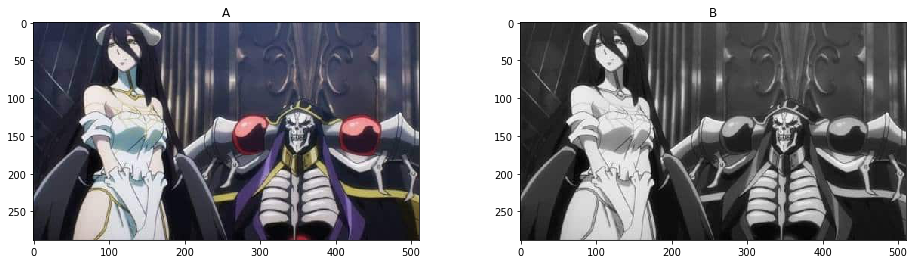

In [11]:
img = cv2.imread('img/overload.jpg')
gray_img = BGR2Gray(img)

showImgNb(img,gray_img)

In [4]:
def computeHistogram(gray_img):
    hist = np.bincount(gray_img.ravel(),minlength=256)
    return hist

In [35]:
hist = computeHistogram(gray_img)
hist.shape

(256,)

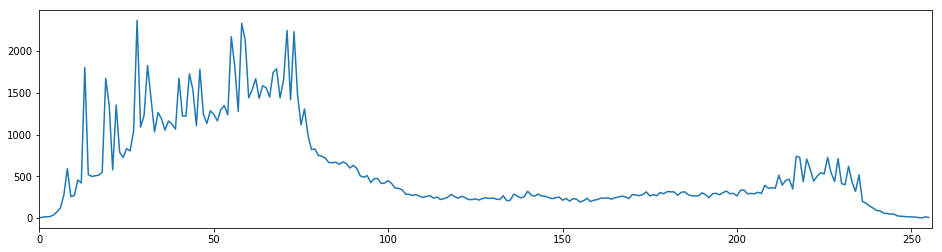

In [66]:
plt.plot(hist)
plt.xlim([0,256])
plt.show()

## Q2: automatic thresholding program
8 points. Use your own automatic thresholding program to a compute a threshold. What is
the threshold you computed? Use OpenCV to threshold the image into 2 colors using your
computed threshold. Print resulting new image.



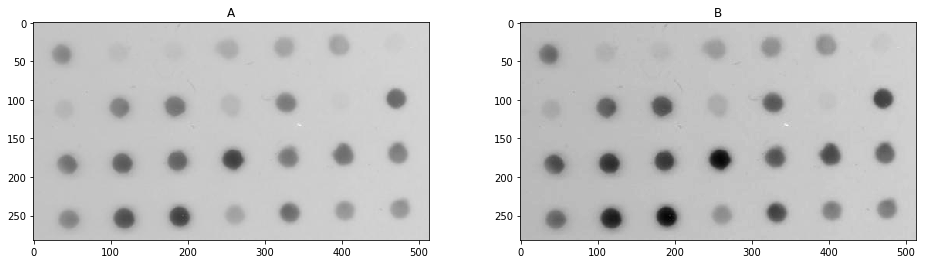

In [18]:
img = cv2.imread('img/dot-blot.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
g_img = BGR2Gray(img)
showImgNb(img, g_img)

In [5]:
def autoThreshold(gray_img):
    hist = computeHistogram(gray_img)
    T = int(round( np.sum(hist * np.arange(256))/np.sum(hist) ))
    oT = T # old T value
    iteration_count = 0
    
    while True:
        iteration_count += 1
        r1 = np.sum(hist[:T] * np.arange(256)[:T]) / np.sum(hist[:T])
        r2 = np.sum(hist[T:] * np.arange(256)[T:]) / np.sum(hist[T:])
        oT, T = T, int(round( (r1+r2)/2 ))
        if oT == T:
            break
    print(f"debug: run {iteration_count} times")
    return T

In [12]:
threshold = autoThreshold(g_img); threshold

debug: run 7 times


163

In [13]:
ret, b_img = cv2.threshold(g_img, threshold, 255, cv2.THRESH_BINARY)

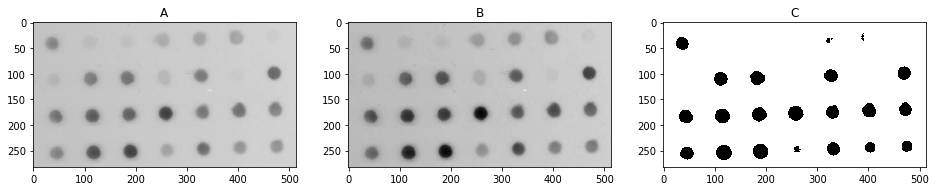

In [19]:
showImgNb(img, g_img, b_img)

## Q3: median filter
3 points. Using OpenCV, filter the original image using Median Filter of
1. 5 x 5
2. 11 x 11

Print the 2 images.

In [104]:
img = cv2.imread('img/noise.png')
g_img = BGR2Gray(img)
img.shape

(568, 382, 3)

In [105]:
mb5_g_img = cv2.medianBlur(g_img,5)
mb11_g_img = cv2.medianBlur(g_img,11)

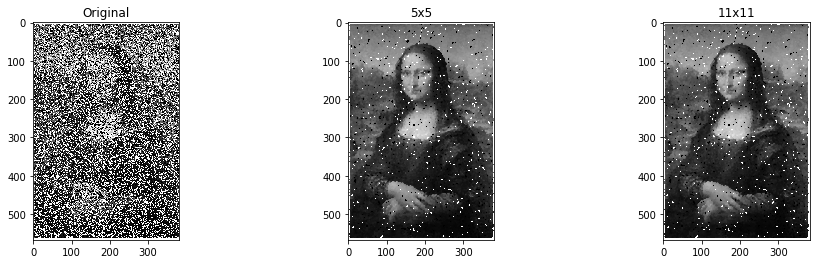

In [108]:
showImgNb(g_img,mb5_g_img, mb5_g_img,fig_names=['Original','5x5','11x11'])

## Q4: Gaussian Filter
4 points. Using OpenCV, filter a video sequence of 2-3 seconds using Gaussian Filter of 
1. 7x7 kernel (sd = 1.1?)  
2. 13 x 13 width (sd = 2?). 

Submit source video and 2 output videos.

In [6]:
import skvideo.io
import skvideo.datasets
videodata = skvideo.io.vread(skvideo.datasets.bigbuckbunny())
print(videodata.shape)

(132, 720, 1280, 3)


In [32]:
videodata = videodata.astype(np.uint8)
skvideo.io.vwrite("original.mp4", videodata)

In [29]:
new_video = []
for img in videodata:
    img = RGB2BGR(img)
    g_img = BGR2Gray(img)
    gbA_img = cv2.GaussianBlur(g_img, (7,7), 1.1)
    new_video.append(gbA_img)

new_video = np.stack(new_video)
new_video.shape

new_video = new_video.astype(np.uint8)
skvideo.io.vwrite("5x5video.mp4", new_video)

In [33]:
new_video = []
for img in videodata:
    img = RGB2BGR(img)
    g_img = BGR2Gray(img)
    gbA_img = cv2.GaussianBlur(g_img, (11,11), 2.0)
    new_video.append(gbA_img)

new_video = np.stack(new_video)
new_video.shape

new_video = new_video.astype(np.uint8)
skvideo.io.vwrite("11x11video.mp4", new_video)

## Q5: Write your own Gaussian Filter
### Gaussian mask
6 points. Compute and print the matrix for Gaussian mask with sd = 2 using kernel size of 13 x13 (we use width = ceiling (6*sd) ). Also show this matrix as an image by scaling max value to 255 so it is visible.

In [32]:
def Gaussian_Mask(kernlen=7, nsig=1):

    # index creation
    minusN = int(-(kernlen-1)/2)
    plusN = int((kernlen-1)/2)
    i = j = np.arange(minusN,plusN+1)
    ii, jj = np.meshgrid(i,j)
    
    gm = np.power(np.e,-(np.power(ii,2)+np.power(jj,2))/(2*np.power(nsig,2)))
    gnn = np.full(gm.shape,gm.min())
    Gm_pos = np.round(gm/gnn)
    Gm = Gm_pos/np.sum(Gm_pos)
    
    return Gm

Text(0.5,1,'13x13 sd=2')

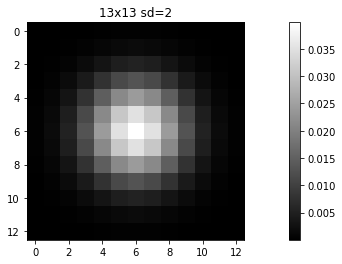

In [98]:
mask = Gaussian_Mask(13,2)
plt.imshow(mask, cmap='gray')
plt.colorbar()
plt.title('13x13 sd=2')

In [29]:
def applyGaussianFilter(g_img,kernsize,sd):
    padsize = int((kernsize-1)/2)
    kern = Gaussian_Mask(kernsize, sd)
    getpadsize = lambda x: ((x,x),(x,x))
    pad_img = np.pad(g_img, getpadsize(padsize), 'edge')

    def getPadCoor(x,y): 
        return x+padsize, y+padsize
    def getImagePart(pad_img,xy,padsize):
        x, y = xy
        return pad_img[y-padsize : (y+padsize+1) , x-padsize : x+padsize+1]
    Y,X = g_img.shape


    lst_img = []
    for y in range(Y):
        row_img = []
        for x in range(X):
            s = np.sum(kern * getImagePart(pad_img,getPadCoor(x,y),padsize))
            row_img.append(s)
        lst_img.append(row_img)
    new=np.array(lst_img)    
    return new
        

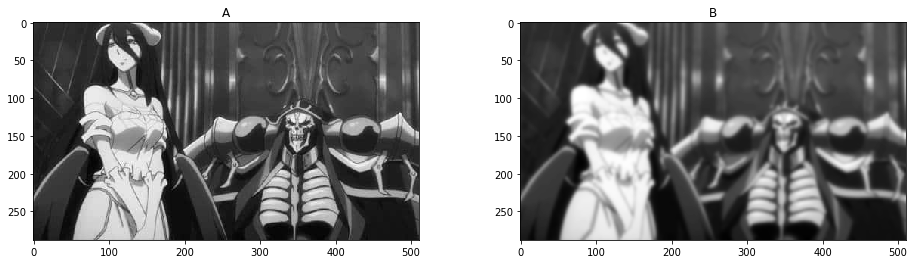

In [30]:
showImgNb(g_img, applyGaussianFilter(g_img,13,2))

In [31]:
new_video = []
for img in videodata:
    img = RGB2BGR(img)
    g_img = BGR2Gray(img)
    gbA_img = applyGaussianFilter(g_img, 13, 2)
    new_video.append(gbA_img)

new_video = np.stack(new_video)
new_video.shape

new_video = new_video.astype(np.uint8)
skvideo.io.vwrite("13x13GausianVideo.mp4", new_video)